<a href="https://colab.research.google.com/github/judrodriguezdu/judrodriguezdu.github.io/blob/main/CIFAR_10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
#Se importan las liberias necesarias

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Se cargan los datos

In [37]:
#Se descarga el dataset y se valida la cantidad de imagenes en el conjunto de entrenamiento y prueba
# Se tienen 50,000 imágenes en el conjunto de entrenamiento y las imágenes son RGB de 32x32

(train_X, train_Y), (test_X, test_Y) = datasets.cifar10.load_data()  
train_X.shape

(50000, 32, 32, 3)

In [38]:
# split training set into train and validation sets
train_X, val_X, train_Y, val_Y = train_test_split(train_X, train_Y, test_size=0.2, random_state=42)

In [39]:
train_X.shape

(40000, 32, 32, 3)

In [40]:
# Se tienen 10,000 imágenes en el conjunto de validación

val_X.shape

(10000, 32, 32, 3)

In [41]:
# Se tienen 10,000 imágenes en el conjunto de prueba

test_X.shape

(10000, 32, 32, 3)

# Exploramos el conjunto de imágenes de prueba

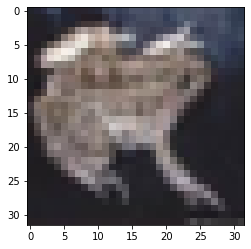

In [42]:
# Visualizamos las imágenes para familiarizarnos con el dataset

plt.imshow(train_X[0])

In [43]:
# Se utiliza reshape para convertir las etiquetas de un array de dos dimensiones a solo una.

train_Y = train_Y.reshape(-1,)
train_Y[:5]

array([6, 2, 5, 6, 3], dtype=uint8)

In [44]:
#Se definen las etiquetas de las imágenes originalmente etiquetas del 0 al 9

label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [45]:
# Se define una función para visualizar la imagen del conjunto de entrenamiento deseada de acuerdo al index con su respectiva etiqueta

def plot_ejemplo(X, y, index):
  plt.figure(figsize=(10,2))  # Se configura el tamaño deseado de las imágenes para su visualización
  plt.imshow(X[index])
  plt.xlabel(label_names[y[index]]) 

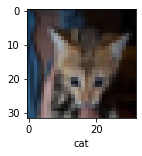

In [46]:
# Es posible visualizar ahora ejemplos de imágenes del conjunto de entrenamiento con su respectiva etiqueta

plot_ejemplo(train_X, train_Y, 30000)

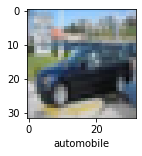

In [47]:
plot_ejemplo(train_X, train_Y, 1000)

# Normalización de las imágenes

In [48]:
# Se normalizan las imágenes

train_X = train_X / 255
val_X = val_X / 255
test_X = test_X / 255

# Un modelo simple de redes neuronales artificiales

In [49]:
# se crea el modelo simple de redes neuronales artificiales con 3 capas y 10 Epochs

modelo = models.Sequential([
         layers.Flatten(input_shape=(32,32,3)), 
         layers.Dense(3000, activation="relu"),
         layers.Dense(1000, activation="relu"),
         layers.Dense(10, activation="sigmoid")                  
      ])

modelo.compile(optimizer="SGD", 
               loss="sparse_categorical_crossentropy", 
               metrics=["accuracy"])

modelo.fit(train_X, train_Y, epochs=10, validation_data=(val_X, val_Y))

Epoch 1/10
1250/1250 [==============================] - 87s 69ms/step - loss: 1.9660 - accuracy: 0.2852 - val_loss: 1.7358 - val_accuracy: 0.3817
Epoch 2/10
1250/1250 [==============================] - 85s 68ms/step - loss: 1.6695 - accuracy: 0.4119 - val_loss: 1.6096 - val_accuracy: 0.4279
Epoch 3/10
1250/1250 [==============================] - 85s 68ms/step - loss: 1.5817 - accuracy: 0.4434 - val_loss: 1.6187 - val_accuracy: 0.4279
Epoch 4/10
1250/1250 [==============================] - 85s 68ms/step - loss: 1.5266 - accuracy: 0.4629 - val_loss: 1.5415 - val_accuracy: 0.4544
Epoch 5/10
1250/1250 [==============================] - 85s 68ms/step - loss: 1.4672 - accuracy: 0.4839 - val_loss: 1.5120 - val_accuracy: 0.4517
Epoch 6/10
1250/1250 [==============================] - 85s 68ms/step - loss: 1.4336 - accuracy: 0.5011 - val_loss: 1.4978 - val_accuracy: 0.4655
Epoch 7/10
1250/1250 [==============================] - 85s 68ms/step - loss: 1.3878 - accuracy: 0.5189 - val_loss: 1.4660 -

In [50]:
# Se evalua el modelo con el conjunto de validación, muestra un probre desempeño

modelo.evaluate(val_X, val_Y)

313/313 [==============================] - 8s 24ms/step - loss: 1.4028 - accuracy: 0.5026


[1.402772307395935, 0.5026000142097473]

In [51]:
#Se obtinene el reporte de clasificación para analizar el desempeño para cada etiqueta  del modelo

from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
pred_Y_ann = modelo.predict(val_X)
pred_Y_labels = [np.argmax(element) for element in pred_Y_ann]

print("Classification Report: \n", classification_report(val_Y, pred_Y_labels))

Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.49      0.53       973
           1       0.74      0.47      0.58       979
           2       0.42      0.34      0.37      1030
           3       0.39      0.31      0.35      1023
           4       0.42      0.44      0.43       933
           5       0.43      0.37      0.40      1015
           6       0.42      0.70      0.52       996
           7       0.62      0.48      0.54       994
           8       0.55      0.79      0.65      1017
           9       0.56      0.64      0.60      1040

    accuracy                           0.50     10000
   macro avg       0.51      0.50      0.50     10000
weighted avg       0.51      0.50      0.50     10000



# Un modelo de redes neuronales convolucionales

In [52]:
# Se define un modelo de tres capas para la extracción de características y una red densa para la clasificación

cnn = models.Sequential([
    
        # cnn se utilizan tres capas 
        layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)), 
        layers.MaxPooling2D((2,2)), 
        
        layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
        layers.MaxPooling2D((2,2)), 

        layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu"),
        layers.MaxPooling2D((2,2)), 
    
        ## dense
         layers.Flatten(),
         layers.Dense(64, activation="relu"),
         layers.Dense(10, activation="softmax"),                  
      ])

cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)              

In [53]:
cnn.compile(optimizer="adam", 
               loss="sparse_categorical_crossentropy", 
               metrics=["accuracy"])

In [54]:
# Se entrena el modelo con 10 Epochs

history = cnn.fit(train_X, train_Y, epochs=10, validation_data = (val_X, val_Y))

Epoch 1/10
1250/1250 [==============================] - 57s 46ms/step - loss: 1.7828 - accuracy: 0.3473 - val_loss: 1.3302 - val_accuracy: 0.5224
Epoch 2/10
1250/1250 [==============================] - 56s 45ms/step - loss: 1.2415 - accuracy: 0.5563 - val_loss: 1.1191 - val_accuracy: 0.5983
Epoch 3/10
1250/1250 [==============================] - 56s 45ms/step - loss: 1.0614 - accuracy: 0.6245 - val_loss: 1.0013 - val_accuracy: 0.6509
Epoch 4/10
1250/1250 [==============================] - 56s 45ms/step - loss: 0.9390 - accuracy: 0.6727 - val_loss: 0.9500 - val_accuracy: 0.6640
Epoch 5/10
1250/1250 [==============================] - 56s 45ms/step - loss: 0.8463 - accuracy: 0.7089 - val_loss: 0.9314 - val_accuracy: 0.6775
Epoch 6/10
1250/1250 [==============================] - 56s 45ms/step - loss: 0.7670 - accuracy: 0.7311 - val_loss: 0.9040 - val_accuracy: 0.6857
Epoch 7/10
1250/1250 [==============================] - 56s 45ms/step - loss: 0.7046 - accuracy: 0.7533 - val_loss: 0.9489 -

# Evaluación del modelo CNN - Validación

In [55]:
# La presición sobre el conjunto de prueba mejoró significativamente al aplicar CNN

cnn.evaluate(val_X, val_Y)

313/313 [==============================] - 4s 13ms/step - loss: 0.9595 - accuracy: 0.6919


[0.9595052599906921, 0.6919000148773193]

313/313 - 4s - loss: 0.9595 - accuracy: 0.6919


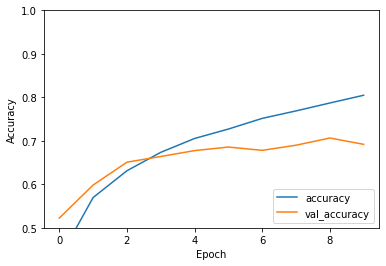

In [56]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0.5, 1])
plt.legend(loc="lower right")

test_loss, test_acc = cnn.evaluate(val_X, val_Y, verbose=2)

In [57]:
print(test_acc)

0.6919000148773193


In [58]:
# Adjustamos la dimensión del array del conjunto de validación 

val_Y = val_Y.reshape(-1,)
val_Y[:5]

array([7, 8, 0, 6, 1], dtype=uint8)

In [59]:
# Definimos el array con las predicciones sobre el conjunto de prueba

pred_Y_cnn = cnn.predict(val_X)

In [60]:
# Definimos el elemento de predicción para cada imagen del conjunto de prueba y validamos la preducción del modelo / vemos que clasifica 
#correctamente 3 de las 5 primeras imágenes

label_Y = [np.argmax(element) for element in pred_Y_cnn]
label_Y[:5]

[7, 8, 0, 2, 1]

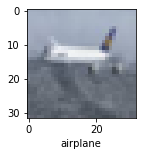

In [61]:
# Un ejemplo de predicción con la imagén 

plot_ejemplo(val_X, val_Y,2)

In [62]:
# Etiqueta que predice el modelo

label_names[label_Y[2]]

'airplane'

In [63]:
pred_Y_cnn = cnn.predict(val_X)
pred_Y_labels = [np.argmax(element) for element in pred_Y_cnn]

print("Classification Report: \n", classification_report(val_Y, pred_y_labels))

Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.77      0.71       973
           1       0.83      0.81      0.82       979
           2       0.56      0.62      0.59      1030
           3       0.64      0.43      0.51      1023
           4       0.69      0.62      0.65       933
           5       0.71      0.48      0.57      1015
           6       0.77      0.74      0.76       996
           7       0.70      0.76      0.73       994
           8       0.74      0.82      0.78      1017
           9       0.66      0.88      0.75      1040

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



In [71]:
# Definimos función para obtener la matriz de confusión

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools

def plot_confusion_matrix(cm, classes, normalize, title):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.binary)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    title_font = {'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 15}
    label_font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 10}
    plt.title(title, fontdict=title_font)
    plt.ylabel('True label',fontdict=label_font)
    plt.xlabel('Predicted label',fontdict=label_font)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()

In [72]:
result_val = cnn.predict(val_X)
pred_Y_val = np.argmax( result_val, axis = 1)

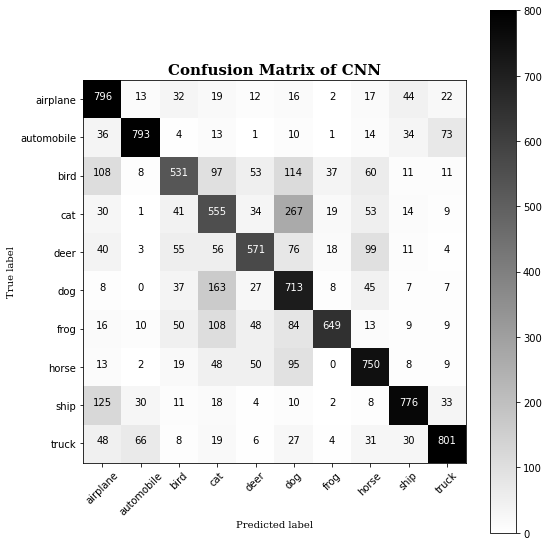

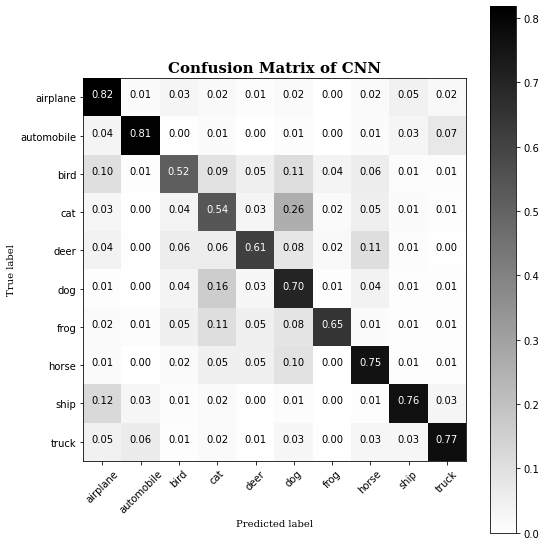

In [73]:
# Compute confusion matrix
cnn_matrix_val = confusion_matrix(val_Y, pred_Y_val)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnn_matrix_val, classes=label_names, normalize=False, 
                      title='Confusion Matrix of CNN')

# Plot normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnn_matrix_val, classes=label_names, normalize=True, 
                      title='Confusion Matrix of CNN')

# Evaluación del modelo CNN - Prueba

In [74]:
cnn.evaluate(test_X, test_Y)

313/313 [==============================] - 4s 13ms/step - loss: 0.9577 - accuracy: 0.7000


[0.9576520323753357, 0.699999988079071]

In [75]:
pred_Y_cnn_test = cnn.predict(test_X)
pred_Y_labels_test = [np.argmax(element) for element in pred_Y_cnn_test]

print("Classification Report: \n", classification_report(test_Y, pred_Y_labels_test))

Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.82      0.73      1000
           1       0.86      0.82      0.84      1000
           2       0.67      0.55      0.60      1000
           3       0.52      0.53      0.52      1000
           4       0.72      0.58      0.64      1000
           5       0.51      0.71      0.59      1000
           6       0.87      0.66      0.75      1000
           7       0.70      0.78      0.74      1000
           8       0.86      0.77      0.81      1000
           9       0.81      0.79      0.80      1000

    accuracy                           0.70     10000
   macro avg       0.72      0.70      0.70     10000
weighted avg       0.72      0.70      0.70     10000



In [65]:
result_test = cnn.predict(test_X)
pred_Y_test = np.argmax( result_test, axis = 1)

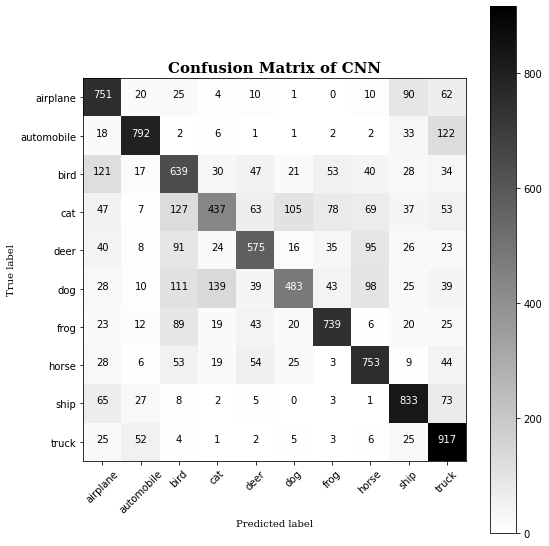

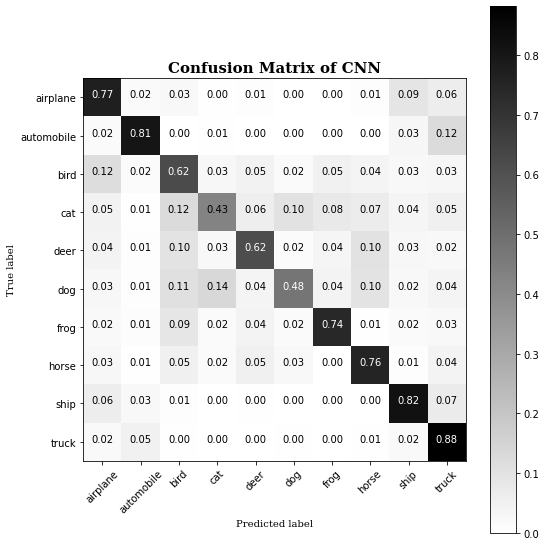

In [66]:
# Compute confusion matrix
cnn_matrix_test = confusion_matrix(val_Y, pred_Y_val)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnn_matrix_val, classes=label_names, normalize=False, 
                      title='Confusion Matrix of CNN')

# Plot normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnn_matrix_val, classes=label_names, normalize=True, 
                      title='Confusion Matrix of CNN')

In [68]:
cnn.evaluate(test_X, test_Y)

313/313 [==============================] - 4s 13ms/step - loss: 0.9577 - accuracy: 0.7000


[0.9576520323753357, 0.699999988079071]

In [69]:
result_cnn = cnn.predict(test_X)
pred_Y_test = np.argmax( result_cnn, axis = 1)

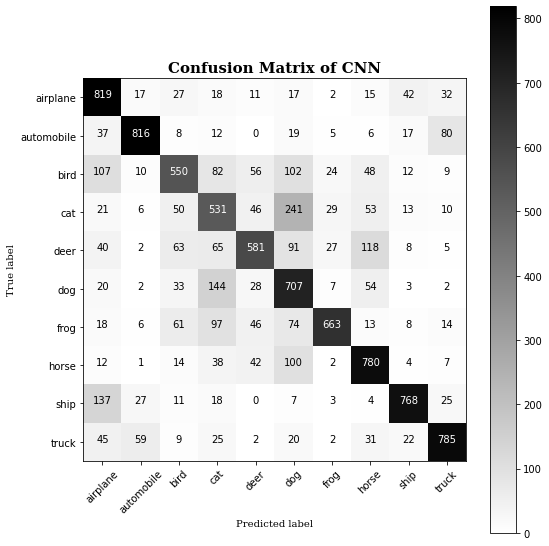

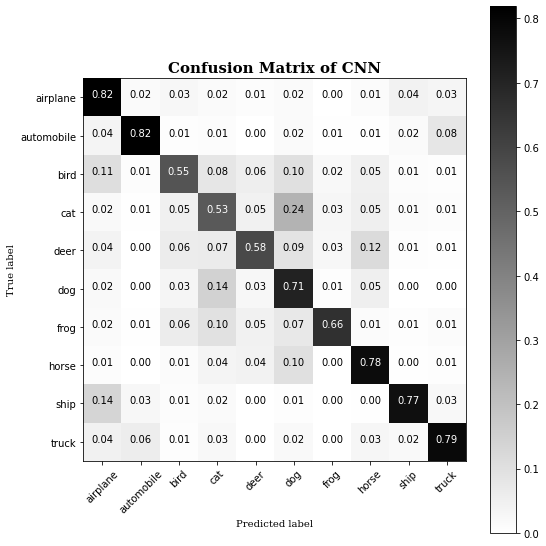

In [70]:
# Compute confusion matrix
cnn_matrix_test = confusion_matrix(test_Y, pred_Y_test)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnn_matrix_test, classes=label_names, normalize=False, 
                      title='Confusion Matrix of CNN')

# Plot normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnn_matrix_test, classes=label_names, normalize=True, 
                      title='Confusion Matrix of CNN')